# How Data Will Make You View Movies Revenue Differently
### by Ali Alkhowaiter

# Table of Contents

* Introduction
* Exploratory Data Analysis
* Conclusions


# Introduction

For this project I decided to analyze the Wine Rating dataset found on Kaggle: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows using the CRISP-DM Process of:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

# Business Understanding

I am a movies lover, also a big fan of some movie stars. I was always impressed on how much revenue some movies get. I’m not an expert in the movie production process, but I always have some questions on, is it because of a certain movie star they get that much of a revenue? Or because of the certificate of the age restrictions? And so many questions I will try to answer as below:

* Who is the most famous star that appears in the top 1000 movies of all time?
* Is there any relation between the star and the revenue?
* And how the critics' opinions affect revenue?


# Exploratory Data Analysis

## Prepare Data

To get started, let's import our libraries.

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import figure

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [2]:
# read in the dataset
df = pd.read_csv('imdb_top_1000.csv')

In [3]:
# check reading in worked and look at the rows in the dataset 
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.60,A young New York socialite becomes interested ...,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.60,Sprawling epic covering the life of a Texas ca...,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.60,"In Hawaii in 1941, a private is cruelly punish...",85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.60,Several survivors of a torpedoed merchant ship...,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


# Assessing the Data
From the above it is clear we have 1000 rows and 16 columns in the dataset.

df columns:

* **Poster_Link:** Link to the poster that imdb is using
* **Series_Title:** Name of the movie
* **Released_Year:** Year at which that movie was released
* **Certificate:** Certificate earned by that movie
* **Runtime:** Total runtime of the movie
* **Genre:** Genre of the movie
* **IMDB_Rating:** Rating of the movie at IMDB site
* **Overview:** Mini story / summary
* **Meta_score:** Score earned by the movie cretics'
* **Director:** Name of the Director
* **Star1:** Name of the Main Stars
* **Star2:** Name of the Stars
* **Star3:** Name of the Stars
* **Star4:** Name of the Stars
* **Noofvotes:** Total number of votes
* **Gross:** Money earned by that movie

In [4]:
# check reading in worked and sample look at the rows in the dataset 
df.sample(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
758,https://m.media-amazon.com/images/M/MV5BNDliMT...,Papurika,2006,U,90 min,"Animation, Drama, Fantasy",7.70,When a machine that allows therapists to enter...,81.00,Satoshi Kon,Megumi Hayashibara,Tôru Emori,Katsunosuke Hori,Tôru Furuya,71379,"881,302"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
390,https://m.media-amazon.com/images/M/MV5BMTk2Mj...,Knockin' on Heaven's Door,1997,NaN,87 min,"Action, Crime, Comedy",8.00,Two terminally ill patients escape from a hosp...,NaN,Thomas Jahn,Til Schweiger,Jan Josef Liefers,Thierry van Werveke,Moritz Bleibtreu,27721,"3,296"
634,https://m.media-amazon.com/images/M/MV5BOWE2MD...,Serenity,2005,PG-13,119 min,"Action, Adventure, Sci-Fi",7.80,The crew of the ship Serenity try to evade an ...,74.00,Joss Whedon,Nathan Fillion,Gina Torres,Chiwetel Ejiofor,Alan Tudyk,283310,"25,514,517"
488,https://m.media-amazon.com/images/M/MV5BYmQ5Mz...,District 9,2009,A,112 min,"Action, Sci-Fi, Thriller",7.90,Violence ensues after an extraterrestrial race...,81.00,Neill Blomkamp,Sharlto Copley,David James,Jason Cope,Nathalie Boltt,638202,"115,646,235"
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.60,Bagheera the Panther and Baloo the Bear have a...,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
852,https://m.media-amazon.com/images/M/MV5BOTZhY2...,The French Connection,1971,A,104 min,"Action, Crime, Drama",7.70,A pair of NYC cops in the Narcotics Bureau stu...,94.00,William Friedkin,Gene Hackman,Roy Scheider,Fernando Rey,Tony Lo Bianco,110075,"15,630,710"
394,https://m.media-amazon.com/images/M/MV5BYWRiYj...,Kôkaku Kidôtai,1995,UA,83 min,"Animation, Action, Crime",8.00,A cyborg policewoman and her partner hunt a my...,76.00,Mamoru Oshii,Atsuko Tanaka,Iemasa Kayumi,Akio Ôtsuka,Kôichi Yamadera,129231,"515,905"
155,https://m.media-amazon.com/images/M/MV5BOTY4Yj...,Batman Begins,2005,UA,140 min,"Action, Adventure",8.20,"After training with his mentor, Batman begins ...",70.00,Christopher Nolan,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1308302,"206,852,432"
424,https://m.media-amazon.com/images/M/MV5BMTkyMT...,Butch Cassidy and the Sundance Kid,1969,PG,110 min,"Biography, Crime, Drama",8.00,"Wyoming, early 1900s. Butch Cassidy and The Su...",66.00,George Roy Hill,Paul Newman,Robert Redford,Katharine Ross,Strother Martin,201888,"102,308,889"


In [5]:
# info about datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


There are a 3 columns with some missing data. but I can't drop any of the missing value columns. I will check if the null values not bigger than 20% of the column.

In [6]:
# Check the persentage of the missing values in Certificate column
(df['Certificate'].isnull().sum() / df.shape[0]) * 100

10.100000000000001

In [7]:
# Check the persentage of the missing values in Meta_score column
(df['Meta_score'].isnull().sum() / df.shape[0]) * 100

15.7

In [8]:
# Check the persentage of the missing values in Gross column
(df['Gross'].isnull().sum() / df.shape[0]) * 100

16.900000000000002

### Quality of the data

Good, they are all below 20% of missing values. I will deal with the missing values later in the article. Now I don't think I need the **Poster_Link** column because there is no value in keeping it.


In [9]:
df_copy = df.drop(['Poster_Link','Overview'], axis=1)
df_copy.sample(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
871,The Quiet Man,1952,Passed,129 min,"Comedy, Drama, Romance",7.70,NaN,John Ford,John Wayne,Maureen O'Hara,Barry Fitzgerald,Ward Bond,34677,"10,550,000"
151,Toy Story 3,2010,U,103 min,"Animation, Adventure, Comedy",8.20,92.00,Lee Unkrich,Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,757032,"415,004,880"
362,The Bourne Ultimatum,2007,UA,115 min,"Action, Mystery, Thriller",8.00,85.00,Paul Greengrass,Matt Damon,Edgar Ramírez,Joan Allen,Julia Stiles,604694,"227,471,070"
146,Up,2009,U,96 min,"Animation, Adventure, Comedy",8.20,88.00,Pete Docter,Bob Peterson,Edward Asner,Jordan Nagai,John Ratzenberger,935507,"293,004,164"
403,Do the Right Thing,1989,R,120 min,"Comedy, Drama",8.00,93.00,Spike Lee,Danny Aiello,Ossie Davis,Ruby Dee,Richard Edson,89429,"27,545,445"
831,The Last Emperor,1987,U,163 min,"Biography, Drama, History",7.70,76.00,Bernardo Bertolucci,John Lone,Joan Chen,Peter O'Toole,Ruocheng Ying,94326,"43,984,230"
576,Paddington 2,2017,U,103 min,"Adventure, Comedy, Family",7.80,88.00,Paul King,Ben Whishaw,Hugh Grant,Hugh Bonneville,Sally Hawkins,61594,"40,442,052"
804,Abre los ojos,1997,U,119 min,"Drama, Mystery, Sci-Fi",7.70,NaN,Alejandro Amenábar,Eduardo Noriega,Penélope Cruz,Chete Lera,Fele Martínez,64082,"368,234"
246,Shin seiki Evangelion Gekijô-ban: Air/Magokoro...,1997,UA,87 min,"Animation, Action, Drama",8.10,NaN,Hideaki Anno,Kazuya Tsurumaki,Megumi Ogata,Megumi Hayashibara,Yûko Miyamura,38847,NaN
24,Saving Private Ryan,1998,R,169 min,"Drama, War",8.60,91.00,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804,"216,540,909"


Here we see the range of **Meta_score** given to a movie. The minimum is 28 and the max is 100. After searching a bit this seems to be a reasonable scale. Using the link here:https://en.wikipedia.org/wiki/Metacritic I found that the Metacritic scale for movies as below:

* 81–100 : Universal acclaim
* 61–80 : Generally favorable reviews
* 40–60 : Mixed or average reviews
* 20–39 : Generally unfavorable reviews
* 0–19 : Overwhelming dislike


In [10]:
df_copy.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,"1,000.00",843.00,"1,000.00"
mean,7.95,77.97,"273,692.91"
std,0.28,12.38,"327,372.70"
min,7.60,28.00,"25,088.00"
25%,7.70,70.00,"55,526.25"
50%,7.90,79.00,"138,548.50"
75%,8.10,87.00,"374,161.25"
max,9.30,100.00,"2,343,110.00"


In [11]:
# check for duplicate rows
sum(df_copy.duplicated())

0

Now it's time to deal with missing values in **Certificate**, **Meta_score**, **Gross**, as the percentages above, the highest missing values percentage is in column **Gross**, but we can predict the Gross and Meta_score later but we can't in the Certificate. So the most reasonable thing is to drop null values in the Certificate column

In [12]:
# the count of all certificate values
Certificate_count = df_copy['Certificate'].count()
Certificate_count

899

In [13]:
# number of missing rows for Certificate
missing_Certificate = df_copy.shape[0] - Certificate_count 
missing_Certificate

101

In [14]:
# percentage of the remaining values
percentage_Certificate = ((df_copy.shape[0] - missing_Certificate) / df_copy.shape[0]) * 100
percentage_Certificate

89.9

If we remove rows with null values in the **Certificate** column, this leaves 89.9% of the rows. I'm comfortable removing these.

In [15]:
# drop only the rows with missing values in column Certificate
df_copy = df_copy.dropna(subset = ['Certificate'])

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   899 non-null    object 
 1   Released_Year  899 non-null    object 
 2   Certificate    899 non-null    object 
 3   Runtime        899 non-null    object 
 4   Genre          899 non-null    object 
 5   IMDB_Rating    899 non-null    float64
 6   Meta_score     787 non-null    float64
 7   Director       899 non-null    object 
 8   Star1          899 non-null    object 
 9   Star2          899 non-null    object 
 10  Star3          899 non-null    object 
 11  Star4          899 non-null    object 
 12  No_of_Votes    899 non-null    int64  
 13  Gross          785 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 105.4+ KB


Let's deal with the columns **Gross**. as we can see above, the datatype of the Gross column is an object, so deleting the missing rows is the best way.

In [17]:
# the count of all Gross values
Gross_count = df_copy['Gross'].count()
Gross_count

785

In [18]:
# number of missing rows for Gross
missing_Gross = df_copy.shape[0] - Gross_count 
missing_Gross

114

In [19]:
# percentage of the remaining values
percentage_Gross = ((df_copy.shape[0] - missing_Gross) / df_copy.shape[0]) * 100
percentage_Gross

87.31924360400444

In [20]:
# drop only the rows with missing values in column Gross
df_copy = df_copy.dropna(subset = ['Gross'])

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   785 non-null    object 
 1   Released_Year  785 non-null    object 
 2   Certificate    785 non-null    object 
 3   Runtime        785 non-null    object 
 4   Genre          785 non-null    object 
 5   IMDB_Rating    785 non-null    float64
 6   Meta_score     714 non-null    float64
 7   Director       785 non-null    object 
 8   Star1          785 non-null    object 
 9   Star2          785 non-null    object 
 10  Star3          785 non-null    object 
 11  Star4          785 non-null    object 
 12  No_of_Votes    785 non-null    int64  
 13  Gross          785 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 92.0+ KB


# Exploratory Data Analysis: Analyse and Visualise

## 1. Who is the most famous star that appears in the top 1000 movies of all time?

First, let's look at the number of the actors (Star 1, Star 2, Star 3, Star 4) appearing in the top 1000 movies.

In [22]:
# number of times an Star1 appears in the top 1000 movies
df_copy['Star1'].value_counts()

Tom Hanks            12
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Leonardo DiCaprio     9
                     ..
Björk                 1
Alan Mak              1
Preity Zinta          1
Javier Bardem         1
Burt Lancaster        1
Name: Star1, Length: 518, dtype: int64

As we can see above, the most actors that appear in the top 1000 movies are Tom Hanks, Robert De Niro, Al Pacino, and Clint Eastwood. No surprise!

Lets draw some charts to make it more readable and understandable. For all actors (Star1, Star2, Star3 and Star4)

In [23]:
df_copy.Star1.value_counts().head(20).sort_values(ascending=False)

Tom Hanks            12
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Leonardo DiCaprio     9
Christian Bale        8
Johnny Depp           8
Denzel Washington     7
Daniel Radcliffe      6
Ethan Coen            6
Tom Cruise            6
Aamir Khan            6
Jake Gyllenhaal       6
Russell Crowe         5
Bruce Willis          5
Charles Chaplin       5
Paul Newman           5
Dustin Hoffman        5
Ethan Hawke           5
Harrison Ford         5
Name: Star1, dtype: int64

Text(0.5, 1.0, 'Most Stars1 Appears In The Top 1000 Movies')

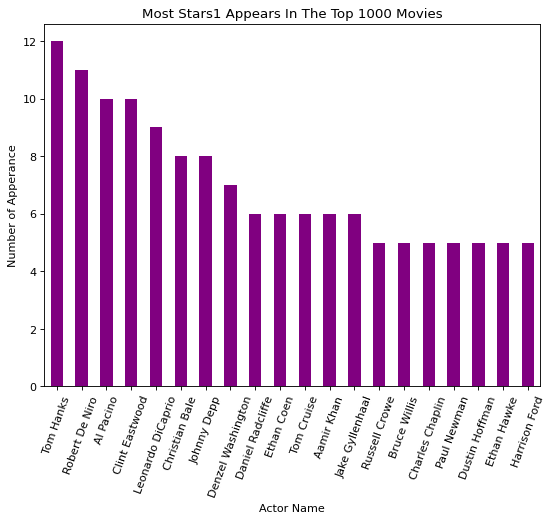

In [24]:
# bar graph of the Star1 Appearance
counts_height = df_copy.Star1.value_counts().head(20).sort_values(ascending=False)

# set the size 
figure(figsize=(8, 6), dpi=80)

#bar graph
counts_height.plot(kind='bar', color = 'purple')

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Actor Name') 

#y-axis labels 
plt.ylabel('Number of Apperance') 

#plot title 
plt.title('Most Stars1 Appears In The Top 1000 Movies') 

Text(0.5, 1.0, 'Most Star2 Appears In The Top 1000 Movies')

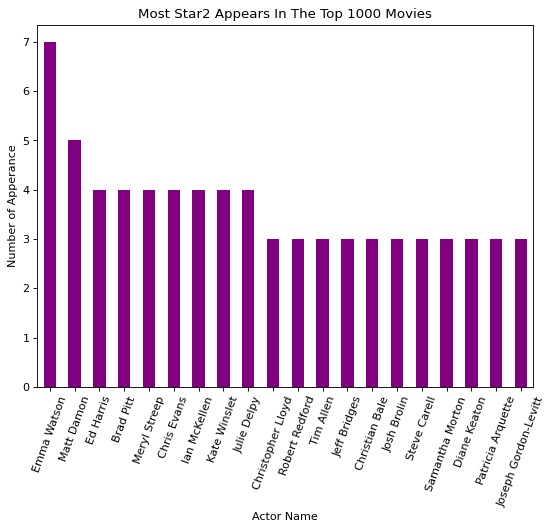

In [25]:
# bar graph of the Star2 Appearance
counts_height = df_copy.Star2.value_counts().head(20).sort_values(ascending=False)
figure(figsize=(8, 6), dpi=80)
counts_height.plot(kind='bar', color = 'purple')
plt.xticks(rotation=70) 
plt.xlabel('Actor Name') 
plt.ylabel('Number of Apperance') 
plt.title('Most Star2 Appears In The Top 1000 Movies') 

Text(0.5, 1.0, 'Most Star3 Appears In The Top 1000 Movies')

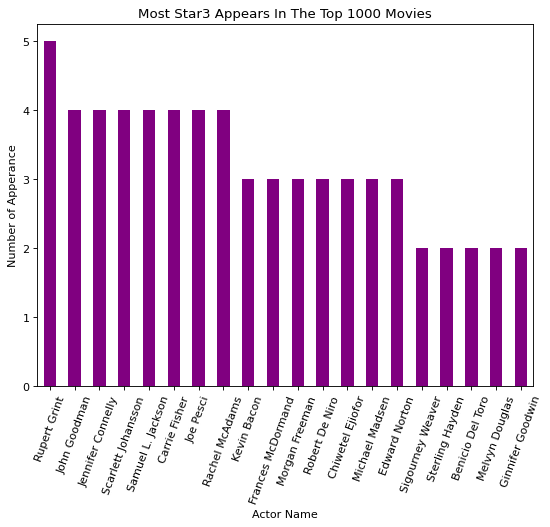

In [26]:
# bar graph of the Star3 Appearance
counts_height = df_copy.Star3.value_counts().head(20).sort_values(ascending=False)
figure(figsize=(8, 6), dpi=80)
counts_height.plot(kind='bar', color = 'purple')
plt.xticks(rotation=70) 
plt.xlabel('Actor Name') 
plt.ylabel('Number of Apperance') 
plt.title('Most Star3 Appears In The Top 1000 Movies') 

Text(0.5, 1.0, 'Most Star4 Appears In The Top 1000 Movies')

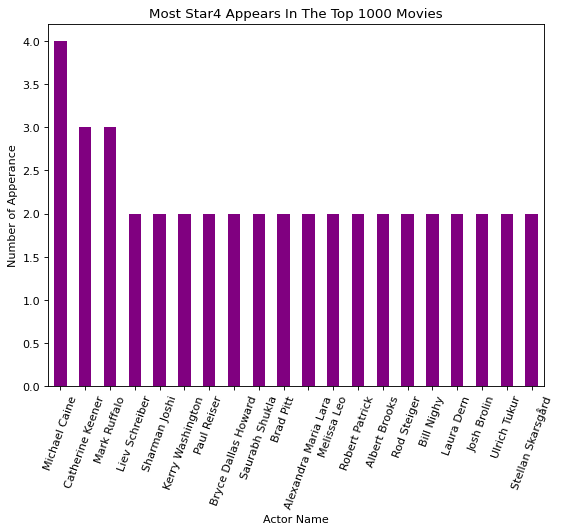

In [27]:
# bar graph of the Star4 Appearance
counts_height = df_copy.Star4.value_counts().head(20).sort_values(ascending=False)
figure(figsize=(8, 6), dpi=80)
counts_height.plot(kind='bar', color = 'purple')
plt.xticks(rotation=70) 
plt.xlabel('Actor Name') 
plt.ylabel('Number of Apperance') 
plt.title('Most Star4 Appears In The Top 1000 Movies') 

## 2. Is there any relation between the star and the revenue? 

First, I will look at the distribution of movie gross. We need to change the datatype from object to int. But we can't change it before removing the commas from the numbers.

In [28]:
# Deleting comma from the values
df_copy['Gross'] = df_copy['Gross'].str.replace(',','')

In [29]:
# Check the data
df_copy.sample(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
722,Deadpool 2,2018,R,119 min,"Action, Adventure, Comedy",7.70,66.00,David Leitch,Ryan Reynolds,Josh Brolin,Morena Baccarin,Julian Dennison,478586,324591735
343,The Revenant,2015,A,156 min,"Action, Adventure, Drama",8.00,76.00,Alejandro G. Iñárritu,Leonardo DiCaprio,Tom Hardy,Will Poulter,Domhnall Gleeson,705589,183637894
42,Léon,1994,A,110 min,"Action, Crime, Drama",8.50,64.00,Luc Besson,Jean Reno,Gary Oldman,Natalie Portman,Danny Aiello,1035236,19501238
833,Der Name der Rose,1986,R,130 min,"Crime, Drama, Mystery",7.70,54.00,Jean-Jacques Annaud,Sean Connery,Christian Slater,Helmut Qualtinger,Elya Baskin,102031,7153487
624,Mr. Nobody,2009,R,141 min,"Drama, Fantasy, Romance",7.80,63.00,Jaco Van Dormael,Jared Leto,Sarah Polley,Diane Kruger,Linh Dan Pham,216421,3600


After deleting the commas, we need to change the datatype of the column to an integer.

In [30]:
# Converting the datatype to int
df_copy['Gross'] = df_copy['Gross'].astype(str).astype(int)

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   785 non-null    object 
 1   Released_Year  785 non-null    object 
 2   Certificate    785 non-null    object 
 3   Runtime        785 non-null    object 
 4   Genre          785 non-null    object 
 5   IMDB_Rating    785 non-null    float64
 6   Meta_score     714 non-null    float64
 7   Director       785 non-null    object 
 8   Star1          785 non-null    object 
 9   Star2          785 non-null    object 
 10  Star3          785 non-null    object 
 11  Star4          785 non-null    object 
 12  No_of_Votes    785 non-null    int64  
 13  Gross          785 non-null    int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 92.0+ KB


Now we changed the datatype of the Gross column, lets now see the most gross by actor. 

In [32]:
# Group by Star1
df_by_star = df_copy.groupby('Star1')
df_by_star = df_by_star.sum()
df_by_star = df_by_star.sort_values('Gross', ascending=False)[:30]

In [33]:
# Displaying the sum of the revenue generated by the actor
df_by_star

,IMDB_Rating,Meta_score,No_of_Votes,Gross
Star1,,,,
Tom Hanks,96.50,956.00,8013801,2493097454
Joe Russo,32.30,291.00,3044263,2205039403
Leonardo DiCaprio,73.20,670.00,9209479,1877321752
Daniel Radcliffe,46.60,455.00,3477737,1835901034
Christian Bale,64.90,566.00,7645252,1351591432
Robert Downey Jr.,23.50,205.00,2783608,1150720327
Elijah Wood,26.40,273.00,4789794,1035942020
Daisy Ridley,7.90,80.00,860823,936662225
Mark Hamill,25.60,230.00,3341258,922340616


In [34]:
# Sorting the values and getting the indexes for the y value
x_value = df_by_star.Gross.sort_values(ascending=False)
y_value = df_by_star.index.to_series()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


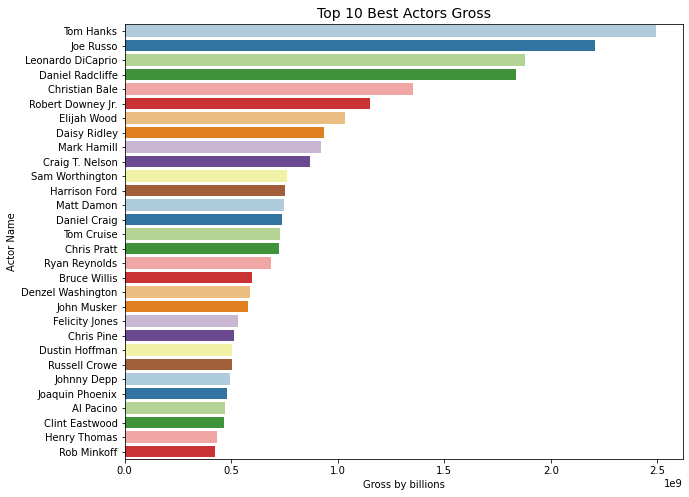

In [35]:
# Displaying the bar chart
plt.figure(figsize=(10,8))
sns.barplot(x_value , y_value , palette='Paired')
plt.title('Top 10 Best Actors Gross', fontsize = 14)
plt.xlabel('Gross by billions')
plt.ylabel('Actor Name');

As we can see, the most earning movies by actors in the data are Tom Hanks, and the most appearing in the data are Tom Hanks. so there is a relation between the biggest gross and the most frequent actor appearing in the data.

# 3. How the critics' opinions affect revenue?

lets look at the data first

In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   785 non-null    object 
 1   Released_Year  785 non-null    object 
 2   Certificate    785 non-null    object 
 3   Runtime        785 non-null    object 
 4   Genre          785 non-null    object 
 5   IMDB_Rating    785 non-null    float64
 6   Meta_score     714 non-null    float64
 7   Director       785 non-null    object 
 8   Star1          785 non-null    object 
 9   Star2          785 non-null    object 
 10  Star3          785 non-null    object 
 11  Star4          785 non-null    object 
 12  No_of_Votes    785 non-null    int64  
 13  Gross          785 non-null    int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 92.0+ KB


there is some missing values, so I will drop all of them. 

In [37]:
df_copy22 = df_copy.dropna()
df_copy22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    object 
 1   Released_Year  714 non-null    object 
 2   Certificate    714 non-null    object 
 3   Runtime        714 non-null    object 
 4   Genre          714 non-null    object 
 5   IMDB_Rating    714 non-null    float64
 6   Meta_score     714 non-null    float64
 7   Director       714 non-null    object 
 8   Star1          714 non-null    object 
 9   Star2          714 non-null    object 
 10  Star3          714 non-null    object 
 11  Star4          714 non-null    object 
 12  No_of_Votes    714 non-null    int64  
 13  Gross          714 non-null    int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 83.7+ KB


In [38]:
meta_score = df_copy22.groupby('Meta_score').mean().sort_values('Gross', ascending=False)[:30]
meta_score

,IMDB_Rating,No_of_Votes,Gross
Meta_score,,,
63.00,7.88,"549,147.00","153,024,297.17"
65.00,7.92,"450,229.53","141,086,441.47"
78.00,7.86,"349,607.22","137,582,002.50"
81.00,7.85,"420,506.16","119,117,432.26"
58.00,7.96,"423,721.43","118,896,308.57"
75.00,7.99,"386,119.63","116,708,865.26"
48.00,7.80,"198,089.00","115,654,751.00"
69.00,7.94,"453,171.71","108,130,270.57"
80.00,7.99,"386,466.92","105,244,863.00"


In [39]:
x_value = meta_score.Gross.sort_values(ascending=False)
y_value = meta_score.index.to_series()

In [40]:
x_value

Meta_score
63.00   153,024,297.17
65.00   141,086,441.47
78.00   137,582,002.50
81.00   119,117,432.26
58.00   118,896,308.57
75.00   116,708,865.26
48.00   115,654,751.00
69.00   108,130,270.57
80.00   105,244,863.00
94.00   105,100,529.73
53.00   102,714,376.75
59.00   100,845,333.00
83.00    93,491,459.10
95.00    93,292,117.44
68.00    91,744,735.21
88.00    90,816,097.10
64.00    90,183,376.00
74.00    89,899,536.96
57.00    88,623,449.50
49.00    88,537,825.00
92.00    88,068,180.00
84.00    87,518,207.32
87.00    87,274,406.47
82.00    83,101,633.52
52.00    82,735,608.25
72.00    81,894,750.20
79.00    79,755,910.81
91.00    79,357,597.00
90.00    76,515,870.21
67.00    75,702,466.38
66.00    73,633,293.59
51.00    72,501,147.00
85.00    72,371,674.30
36.00    69,951,824.00
71.00    66,693,829.07
70.00    65,521,506.13
73.00    64,821,700.96
96.00    62,269,274.25
30.00    57,938,693.00
Name: Gross, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


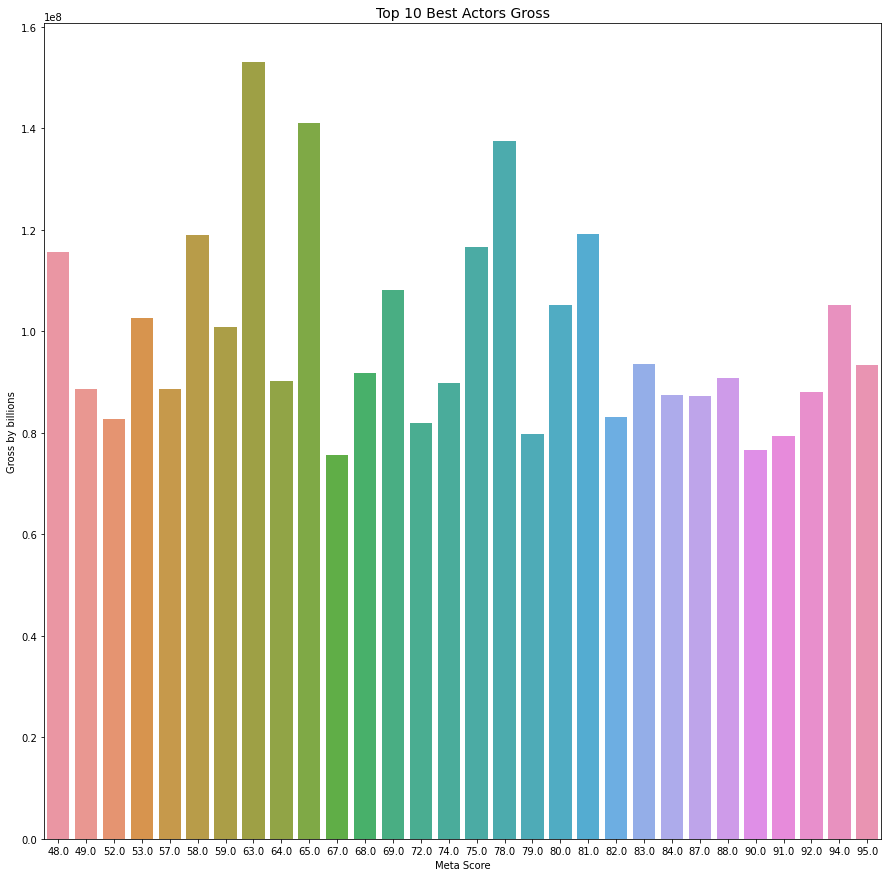

In [41]:
plt.figure(figsize=(15,15))
sns.barplot(y_value.head(30) , x_value.head(30))
plt.title('Top 10 Best Actors Gross', fontsize = 14)
plt.xlabel('Meta Score')
plt.ylabel('Gross by billions');

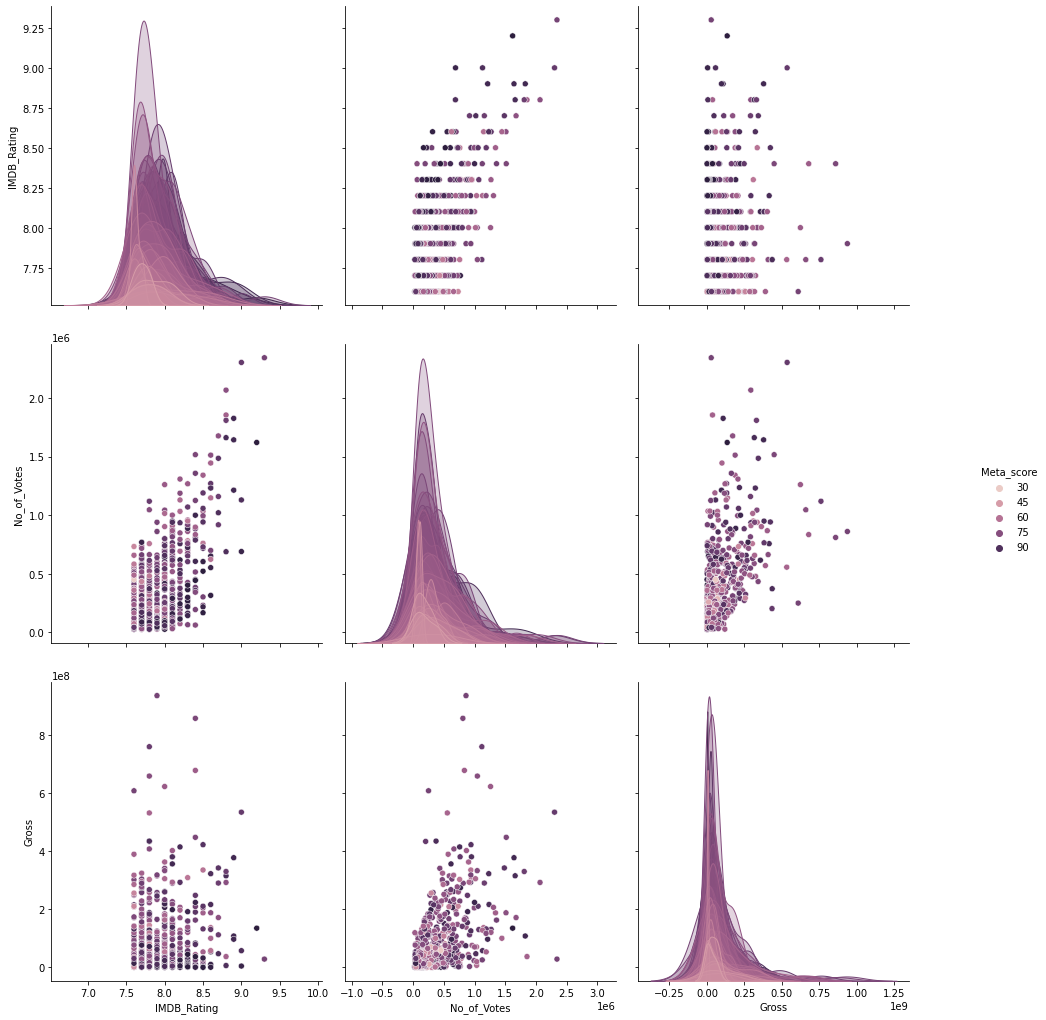

In [42]:
# Visualize pairplot of df
g = sns.pairplot(df_copy, hue = 'Meta_score')
g.fig.set_size_inches(15,15)

as we can see above, we can not say either way if the critics affect the revenue of the movie, there are movies with low meta score rating and the revenue is off the charts.

# What words are most used when describing a movie? 

In [43]:
# source: https://www.datacamp.com/community/tutorials/wordcloud-python
# start with one review
text = df.Overview[1]

In [44]:
# combine all movies reviews into one big text
text = " ".join( overview for overview in df.Overview)
print ("There are " + str(len(text)) + " words in the combination of all overview.")

There are 147254 words in the combination of all overview.


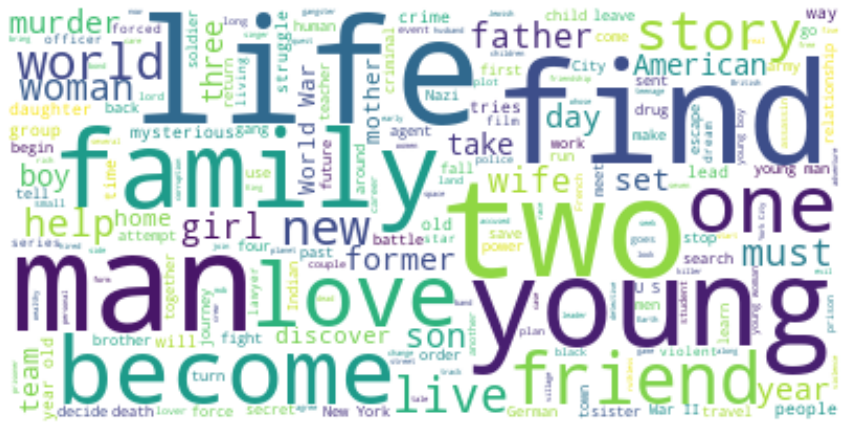

In [45]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["movie"])

# Generate a word cloud image
wordcloud = WordCloud( stopwords = stopwords, background_color = "white").generate(text)

# Display the generated image
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Conclusions

* The Most appearing superstar in the top 1000 movies is tom hanks.
* There is a corelation between the actors and the revenue of the movies.
* The criticts openions do not always affect the revenue, there is no clear data to tell if it's affective or not.  


# Sources

* https://www.datacamp.com/community/tutorials/wordcloud-python
* https://www.stackoverflow.com
* https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

# Acknowledgements

As this was my first project at Udacity, it was hard for me at the beganing. So I took some inspiration from this project.
https://github.com/stephanieirvine/Udacity-Data-Scientist-Nanodegree/blob/main/Project%201/Wine_Rating_StephIrvine.ipynb

It helped me to follow the guidelines.
So big thanks to Stephanie and his great work.